<a href="https://colab.research.google.com/github/SeekingNirvaana/Data-Analysis-Visualisation/blob/main/RideSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






## **Bike Sharing Demand Prediction**

**Problem**

Recently there has been a huge increase in demand of bike share around the globe. People are using these bikes to commute mostly for short distance, i.e from office to parking lot or within the campus or office to restaurant. Therefore it is important to make bikes available to public during the hours when demand is more. Eventually, providing stable supply of bikes is crucial for rental bikes company.

**Data Description**

The data was recorded in Seoul the capital of South Korea. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. The data was retreived from UCI machine learning repository, it was made available on UCI on 03-01-2020. The dataset has 8760 instances and 14 attributes. 

**Attributes**

Date : year-month-day    
Rented Bike count - Count of bikes rented at each hour    
Hour - Hour of he day    
Temperature-Temperature in Celsius     
Humidity - %     
Windspeed - m/s      
Visibility - 10m       
Dew point temperature - Celsius            
Solar radiation - MJ/m2              
Rainfall - mm               
Snowfall - cm              
Seasons - Winter, Spring, Summer, Autumn           
Holiday - Holiday/No holiday                     
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


"""

**Importing essential library**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error

# """ **Loading the dataset** """

In [2]:
bikedata = pd.read_csv('/content/drive/MyDrive/DATASETS/SeoulBikeData.csv', encoding= 'unicode_escape')

bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Understanding the dataset**

Knowing more about the numerical columns and about the Data type of each column

In [3]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


This Dataset contains 8760 lines and 14 columns. In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.

In [4]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
bikedata.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

After checking the unique values of all the attributes we can see Date has 365 unique values that means 1 year of whole data has been collected for every hour. The object attribures Season has 4 unique values, Holiday has 2 unique values, Functioning Day 2 unique values.

In [6]:
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The data has zero null values that means we don't require data cleaning. 

#Checking Duplicate Values

In [7]:
len(bikedata[bikedata.duplicated()])

0


The dataset has zero duplicate values.



**Processing the dataset**

Making the copy of original data into and applying all the neccessary changes on the copied dataset by that we are not hampering the original dataset.


In [8]:
dataframe = bikedata.copy()

Converting the date column into three different column i.e. year, month, day. Because the date column is object and we can't put into machine learine algortihm like that. We will be dropping date column because it will be of no use and we will also be droping the year column as we will be making prediction based out of Day, Month and Hour.

#extracting month and day and removing year

In [9]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Month'] = dataframe['Date'].apply(lambda x: x.month)
dataframe['Day'] = dataframe['Date'].apply(lambda x: x.day)
dataframe= dataframe.drop('Date', axis = 1)

#Checking if changes are applied or not

In [10]:
dataframe.head()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12


In [17]:
Seasons_cat=dataframe['Seasons'].unique()

## Handling the cyclic data. 
Hour ranges from 0-23 and is cyclic in nature, So the most logical way to transform hour is into two variables that swing back and forth out of sync. The x position swings back and forth out of sync with the y position. For a 24-hour clock we accomplish this with x=sin(2pi*hour/24),y=cos(2pi*hour/24).

We need both variables or the proper movement through time is lost. This is due to the fact that the derivative of either sin or cos changes in time where as the (x,y) position varies smoothly as it travels around the unit circle.

In [18]:
dataframe['Hour_sin'] = np.sin(dataframe['Hour'] * (2 * np.pi / 24))
dataframe['Hour_cos'] = np.cos(dataframe['Hour'] * (2 * np.pi / 24))

Changing some catagorical columns into numerical.
Spring -> 0
Summer -> 1
Autumn -> 2
Winter -> 3

No Holiday -> 0
Holiday -> 1

Non Functioning Day -> 0
Functioning Day -> 1

#Changing the categorical variable of dataset into numerical values.

'Seasons','Hour', 'Holiday','Month','Day', 'Functioning Day' column are show as a integer data type but actually it is a category data, therefore changing those column into category.

In [21]:
dataframe.Seasons.replace('Winter',3,inplace= True)
dataframe.Seasons.replace('Spring',0,inplace= True)
dataframe.Seasons.replace('Summer',1,inplace= True)
dataframe.Seasons.replace('Autumn',2, inplace= True)
dataframe.Holiday.replace('No Holiday',0,inplace= True)
dataframe.Holiday.replace('Holiday',1, inplace= True)
dataframe['Functioning Day'].replace('Yes',1,inplace= True)
dataframe['Functioning Day'].replace('No',0,inplace= True)

#dataframe

#dataframe.info()

In [22]:
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day','Month','Day','Hour_sin','Hour_cos']
dataframe[numeric_features + ['Rented Bike Count']].describe()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Hour_sin,Hour_cos,Rented Bike Count
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8.760000e+03,8.760000e+03,8760.000000
mean,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2.493151,0.049315,0.966324,6.526027,15.720548,4.765341e-18,-1.110223e-16,704.602055
std,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.119301,0.216537,0.180404,3.448048,8.796749,7.071471e-01,7.071471e-01,644.997468
min,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,0.000000
25%,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000,8.000000,-7.071068e-01,-7.071068e-01,191.000000
50%,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2.000000,0.000000,1.000000,7.000000,16.000000,6.123234e-17,-6.123234e-17,504.500000
75%,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,3.000000,0.000000,1.000000,10.000000,23.000000,7.071068e-01,7.071068e-01,1065.250000
max,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,4.000000,1.000000,1.000000,12.000000,31.000000,1.000000e+00,1.000000e+00,3556.000000


##**Exploratory Data Analysis**

[Text(0.5, 1.0, 'Count of bikes on Functioning Day')]

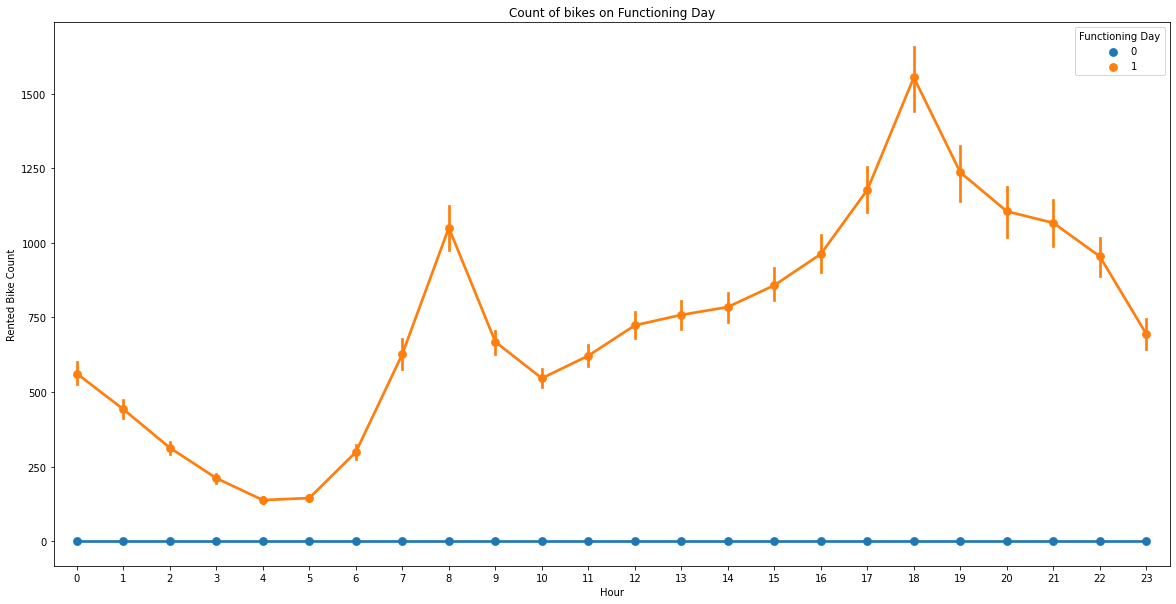

In [23]:
fig, ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=dataframe, x='Hour',y='Rented Bike Count', hue='Functioning Day', ax=ax)
ax.set(title='Count of bikes on Functioning Day')

From the above graph we can see peoples don't use rented bikes on no-functioning day. 

[Text(0.5, 1.0, 'Count of bikes on respect to Seasons')]

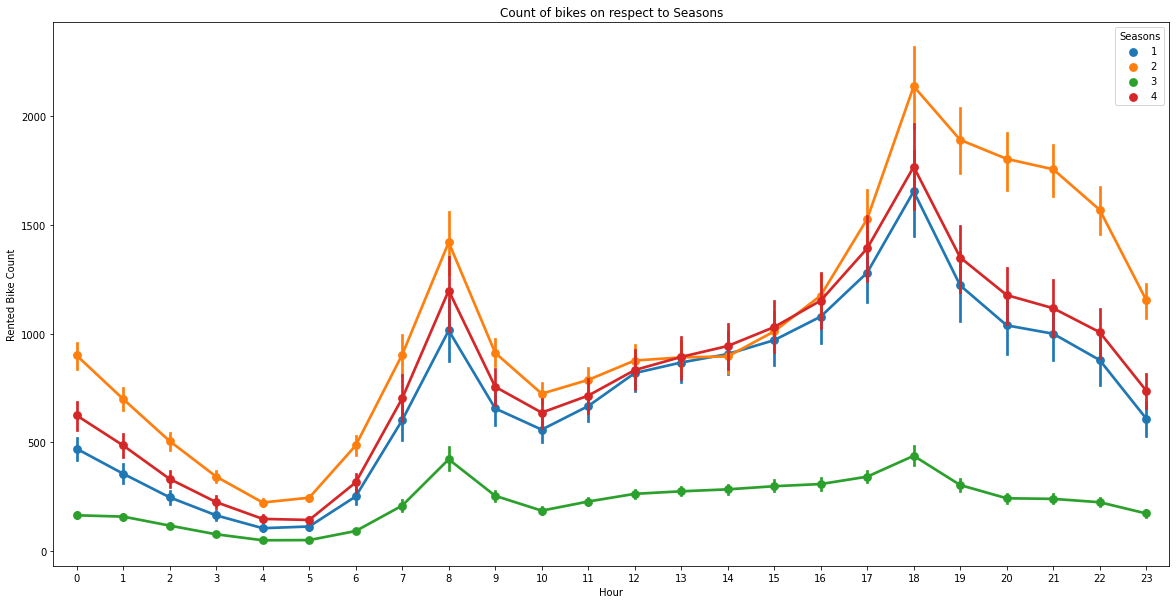

In [24]:
fig, ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=dataframe, x='Hour',y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Count of bikes on respect to Seasons')

Above plot shows the use of rented bike in four different seasons. In summer season the use of rented bike is high and the peak time is around 7am-9am and 5pm-7pm for all four season which is the time when most of the people is going to office or comming back.

[Text(0.5, 1.0, 'Count of bikes repect to temperature')]

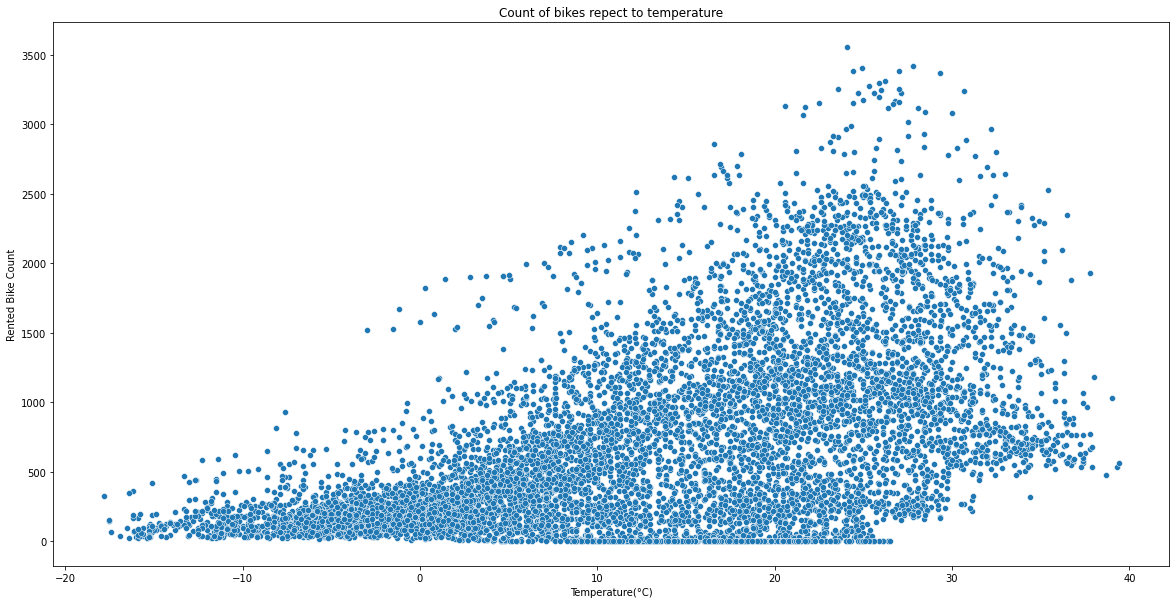

In [25]:
fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Temperature(°C)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes repect to temperature')


From the above dot plot we can see the dots are concentrated between 10 to 30 C. More bikes are used between temperature 10C to 30C. 

[Text(0.5, 1.0, 'Count of bikes repect to Humidity')]

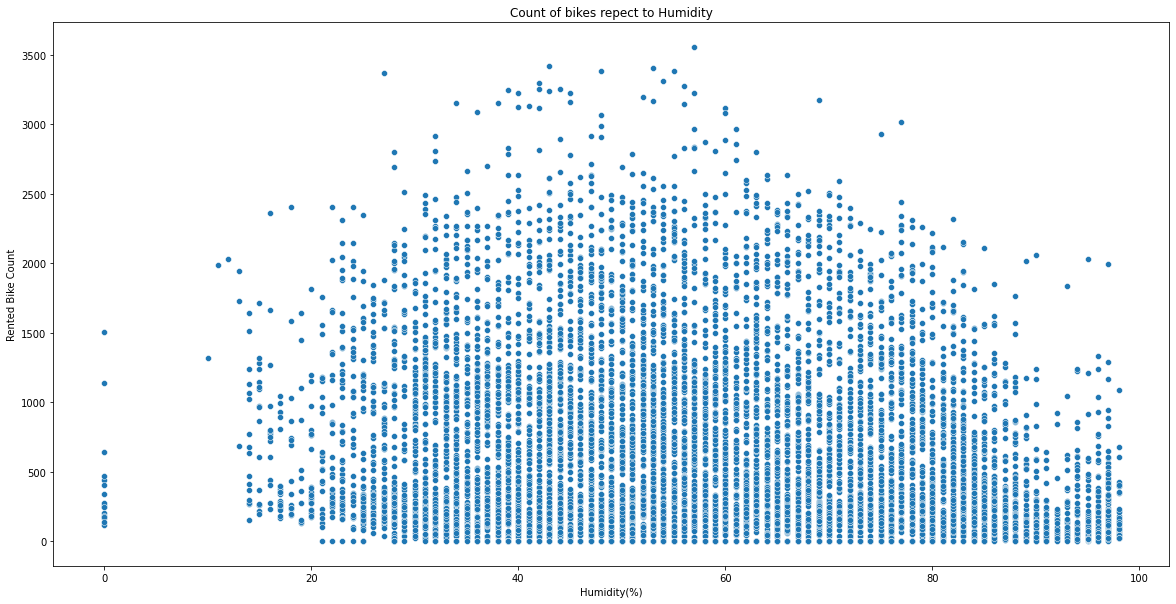

In [26]:
fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Humidity(%)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes repect to Humidity')

As the Humidity is increasing the rented bike count is decreasing.

[Text(0.5, 1.0, 'Rented Bike Count with respect to day')]

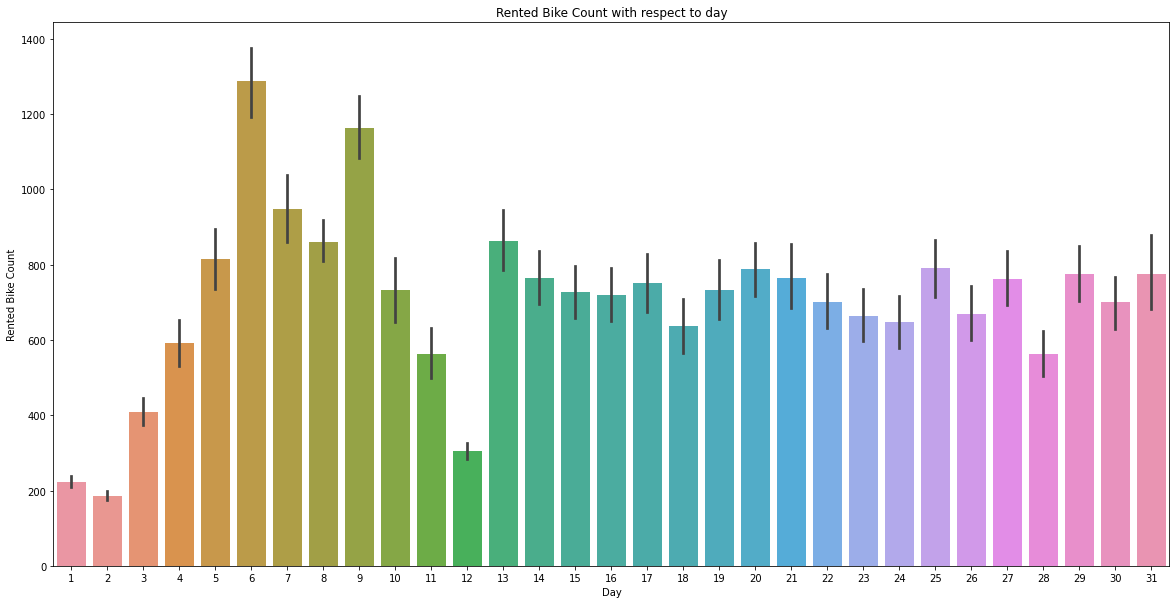

In [27]:
fig, ax= plt.subplots(figsize=(20,10))
sns.barplot(data=dataframe, x='Day',y='Rented Bike Count', ax=ax)
ax.set(title='Rented Bike Count with respect to day')

The bikes are rented more on 6th and 9th day of every week. But this is not telling the complete story of data as it might be non-working day in some month.

[Text(0.5, 1.0, 'Rented bike count with respect to Month')]

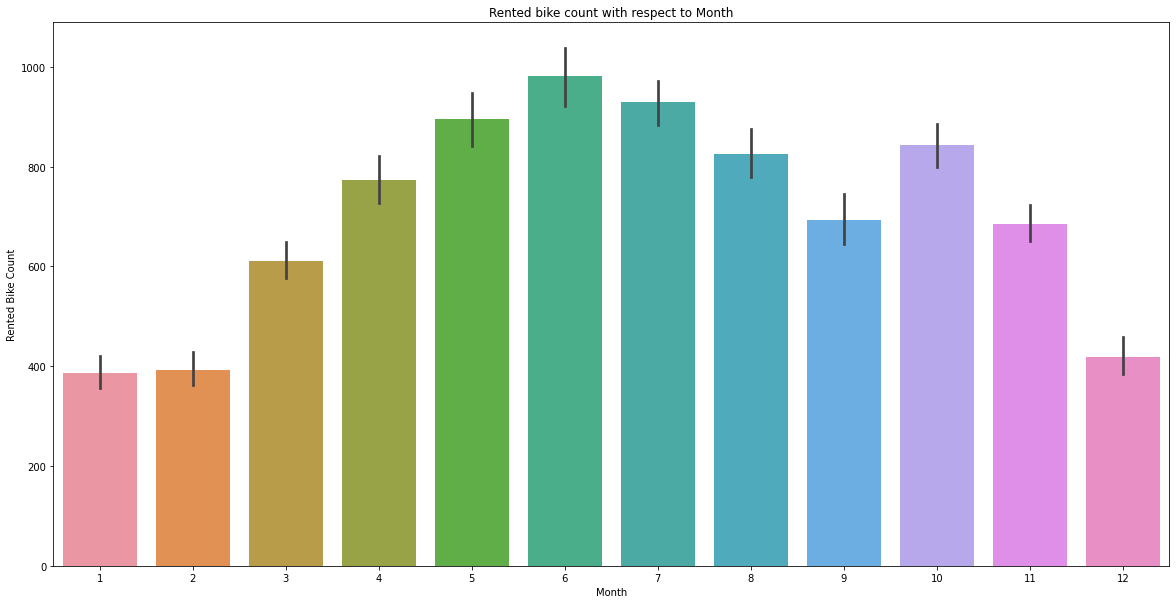

In [28]:
fig, ax= plt.subplots(figsize=(20,10))
sns.barplot(data=dataframe, x='Month',y='Rented Bike Count', ax=ax)
ax.set(title='Rented bike count with respect to Month')

The above barplot shows us the relation between Rented Bike count and months.And it can be seen that the bike is rented more in the month of June.

[Text(0.5, 1.0, 'Demand for Rented Bike in different seasons')]

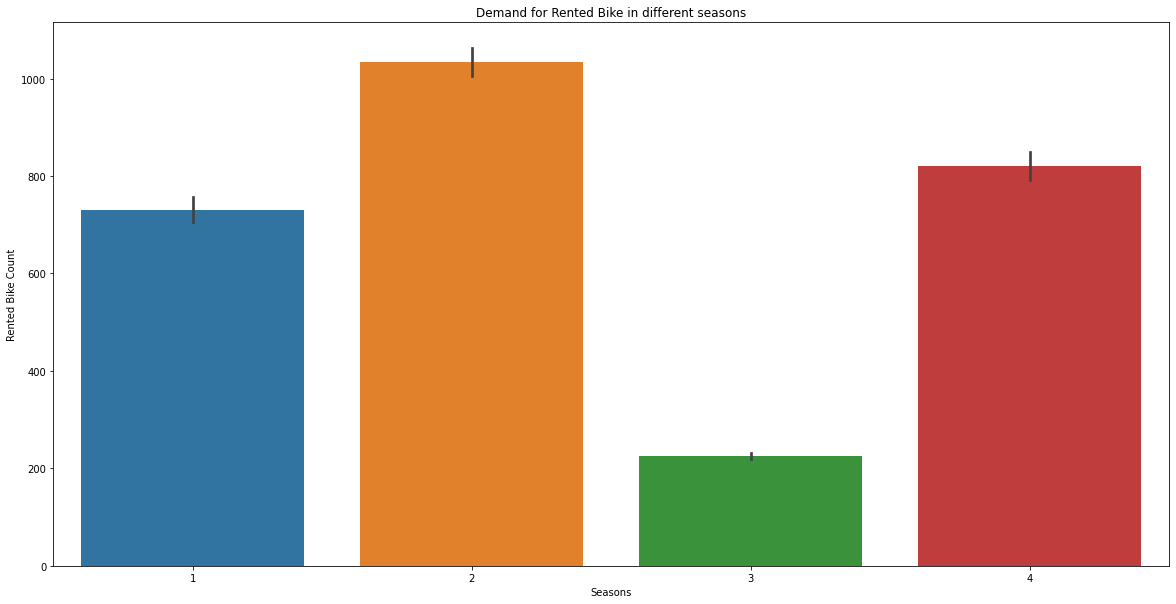

In [29]:
fig, ax= plt.subplots(figsize=(20,10))
sns.barplot(data=dataframe, x='Seasons',y='Rented Bike Count', ax=ax)
ax.set(title='Demand for Rented Bike in different seasons')

This boxplot depicts that in Summer season, there is highest demand for rented bikes followed by Autumn season and then Spring season. Winter season has recorded the least demand.

[Text(0.5, 1.0, 'Count of rented bikes during holidays')]

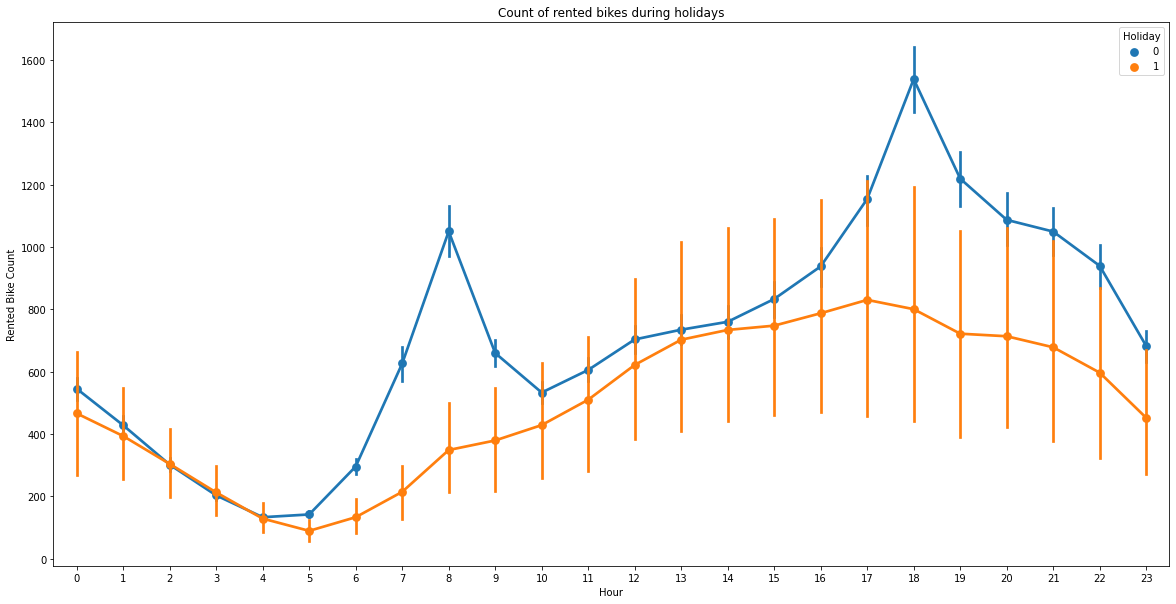

In [30]:
fig, ax= plt.subplots(figsize=(20,10))
sns.pointplot(data=dataframe, x='Hour',y='Rented Bike Count', hue='Holiday', ax=ax)
ax.set(title='Count of rented bikes during holidays')

This line diagram is showing the demand for rented bikes on holidays and weekdays. And the demand for rented bike is higher on weekdays than holidays.

[Text(0.5, 1.0, 'Count of bikes on respect to Windspeed')]

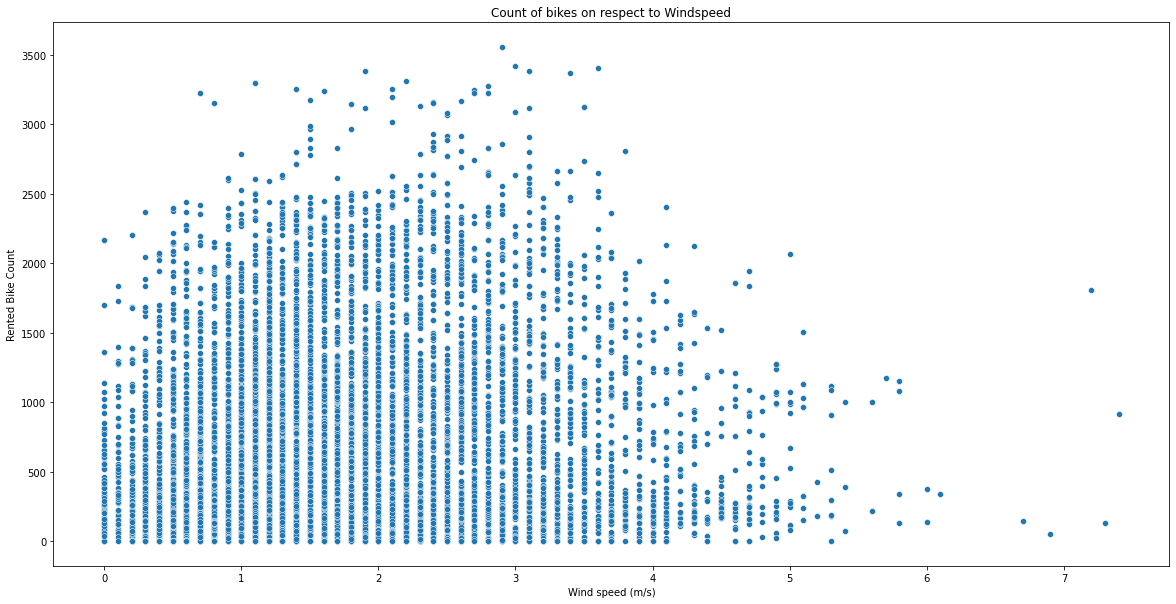

In [31]:
dataframe

fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Wind speed (m/s)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes on respect to Windspeed')

This plot shows us that as the wind speed is increasing the use of rented bike is decreasing.

[Text(0.5, 1.0, 'Count of bikes on respect to Rainfall')]

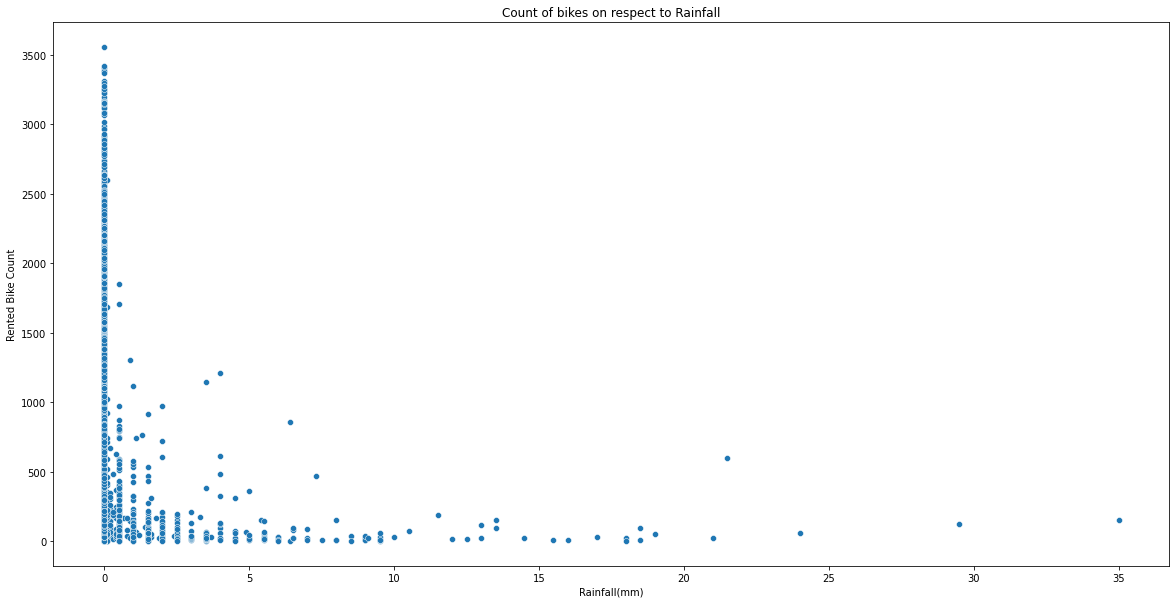

In [32]:
fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Rainfall(mm)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes on respect to Rainfall')

It's quite evident by looking at this plot, that the users don't prefer to rent a bike during rainfall.

[Text(0.5, 1.0, 'Count of bikes on respect to Solar Radiation')]

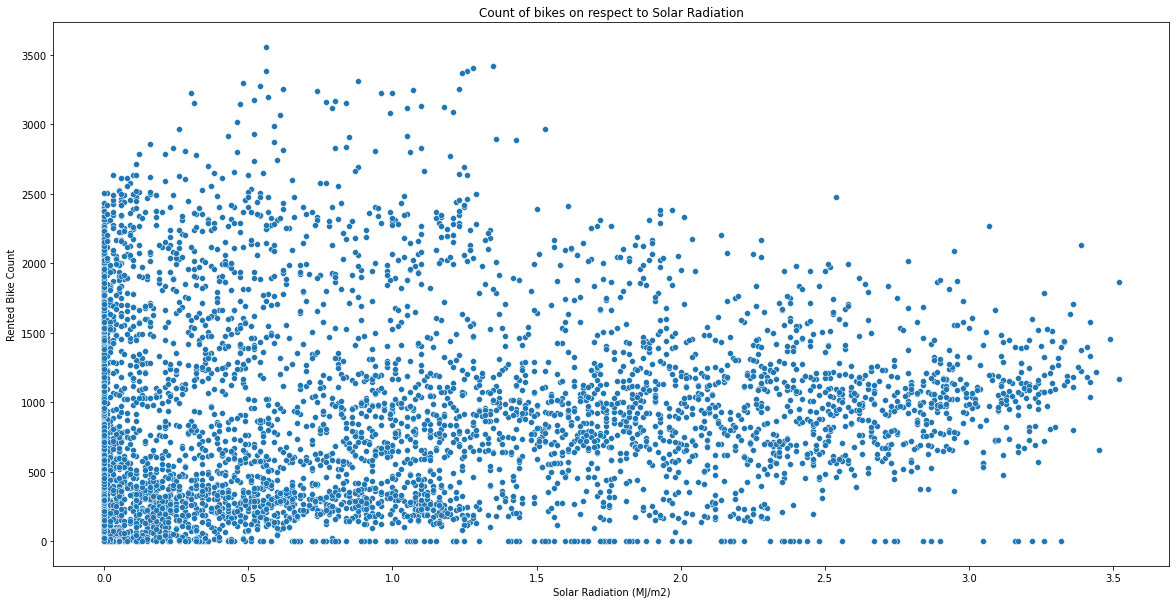

In [33]:
fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Solar Radiation (MJ/m2)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes on respect to Solar Radiation')

From the ablove plot it can be said that the users avoid taking rented bikes, when there is increase in solar radiation.

[Text(0.5, 1.0, 'Count of bikes on respect to Dew point temperature')]

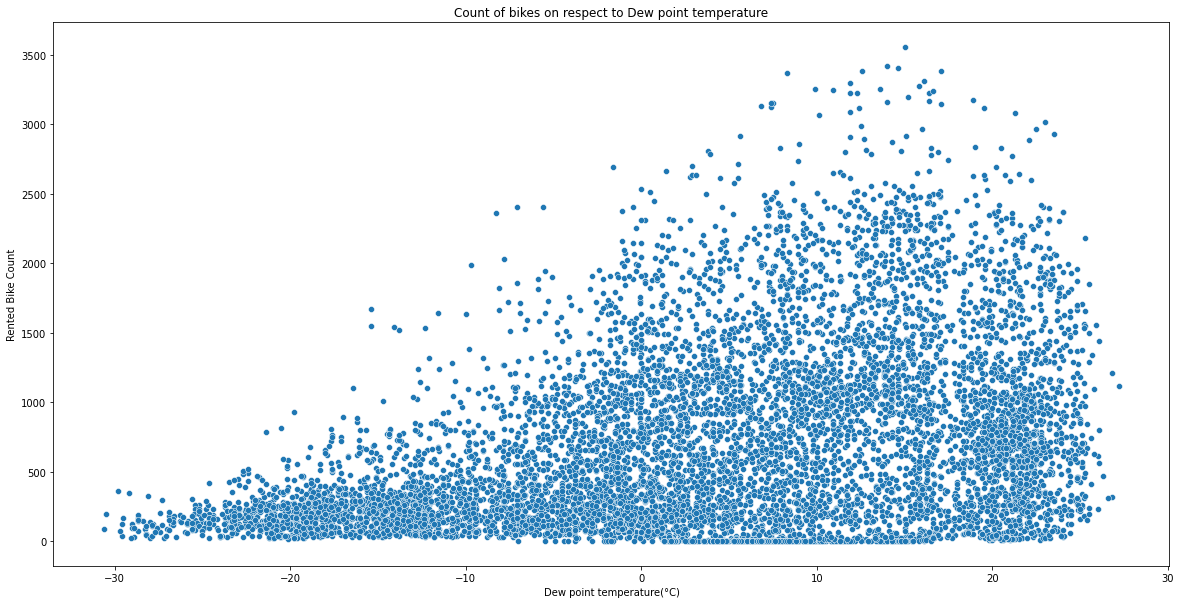

In [34]:
fig, ax= plt.subplots(figsize=(20,10))
sns.scatterplot(data=dataframe, x='Dew point temperature(°C)',y='Rented Bike Count', ax=ax)
ax.set(title='Count of bikes on respect to Dew point temperature')

This plot is inverse of Rented bike count vs Humidity plot as the temperature of air increases the humidity decreases, therefore we can see here that as temperature increases the demand for rented bike increases.

**Correlation**

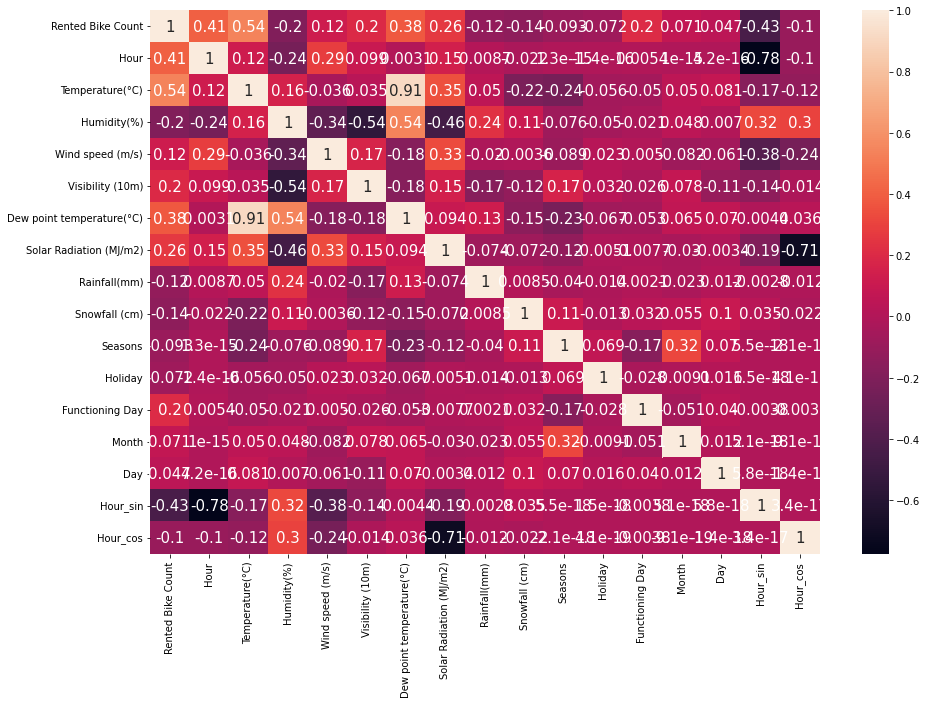

In [35]:
corr = dataframe.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

From the above correlation plot we can say that temperature is more correlated to the response (rented bike count), then comes dew point temperature, solar radiation. Humidity has negative correaltion with the response.

In [36]:
corr1 = dataframe.corr()
corr1['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Functioning Day              0.203943
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Month                        0.070861
Day                          0.046849
Holiday                     -0.072338
Seasons                     -0.093084
Hour_cos                    -0.099507
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Hour_sin                    -0.431773
Name: Rented Bike Count, dtype: float64

Same correlation as seen in correlation plot can be seen above.

#**Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

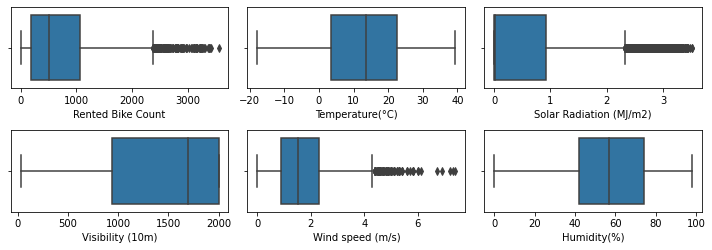

In [37]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(["Rented Bike Count", "Temperature(°C)", "Solar Radiation (MJ/m2)","Visibility (10m)","Wind speed (m/s)","Humidity(%)"]):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(dataframe[j])
    plt.tight_layout()

We can see ouliers in Rented Bike Count, Solar Radiation and Wind Speed.

##**Model**

**Spliting the data into two parts X and Y**     
y= rented bike count and X = all other data   


In [39]:
X = dataframe.drop(columns=['Rented Bike Count','Hour'])
y = dataframe['Rented Bike Count']


(7008, 15)
(1752, 15)


## Feature Selection

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [41]:
print(model.feature_importances_)
model.feature_importances_.sum()

[0.24797951 0.08943554 0.01486715 0.02858055 0.06563335 0.05273706
 0.02574699 0.00136927 0.04248708 0.00590344 0.07427416 0.01968408
 0.01505348 0.23400804 0.0822403 ]


1.0

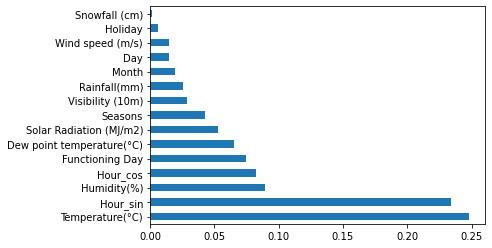

In [42]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(numeric_features)).plot(kind='barh')
plt.show()

In [49]:
pd.Series((model.feature_importances_)>0.05, index=X.columns)

Temperature(°C)               True
Humidity(%)                   True
Wind speed (m/s)             False
Visibility (10m)             False
Dew point temperature(°C)     True
Solar Radiation (MJ/m2)       True
Rainfall(mm)                 False
Snowfall (cm)                False
Seasons                      False
Holiday                      False
Functioning Day               True
Month                        False
Day                          False
Hour_sin                      True
Hour_cos                      True
dtype: bool

In [51]:
X_FS = dataframe.drop(columns=['Rented Bike Count','Hour','Wind speed (m/s)','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Month','Day'])
y_FS = dataframe['Rented Bike Count']


Before fiiting any model we divide the data set into two proportion, one will be training set and another one will be test set. Some of the data will go to training set and some of the data will go to test set. We have assigned 80% of the data to training set and 20% data to test set.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 15)
(1752, 15)


In [52]:
from sklearn.model_selection import train_test_split
XFS_train, XFS_test, yFS_train, yFS_test = train_test_split(X_FS,y_FS, test_size=0.20, random_state=0)
print(XFS_train.shape)
print(XFS_test.shape)

(7008, 7)
(1752, 7)


Test set has 1752 data points whereas Training Set has 7008 data points.

**Linear Regression**

First we will be using Linear Regression to predict the demand of bikes. Linear Regression finds the best fit line drawn over the values of independent variables and dependent variable.

In [55]:
from sklearn.linear_model import LinearRegression
modelreg= LinearRegression()
modelregFS= LinearRegression()
modelreg.fit(X_train, y_train)
modelregFS.fit(XFS_train, yFS_train)


y_pred1=modelreg.predict(X_test)
y_predFS1=modelregFS.predict(XFS_test)

#Checking the accuracy

In [56]:
## Without Feature Selection
modelreg.score(X_test, y_test)

modelreg.score(X_train,y_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 333.6920544242397
Mean Squared Error: 203951.45210420166
Root Mean Squared Error: 451.60984500362883


In [58]:
## With Feature Selection
modelregFS.score(XFS_test, yFS_test)

modelregFS.score(XFS_train,yFS_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yFS_test, y_predFS1))
print('Mean Squared Error:', metrics.mean_squared_error(yFS_test, y_predFS1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yFS_test, y_predFS1)))

Mean Absolute Error: 340.32765165619355
Mean Squared Error: 211535.0368932449
Root Mean Squared Error: 459.92938250697233


**Gradient Boosting**

Mean Absolute Error: 179.3752968699769
Mean Squared Error: 69185.08168799632
Root Mean Squared Error: 263.03057177445424


[Text(0.5, 1.0, 'Count of bikes on respect to Seasons')]

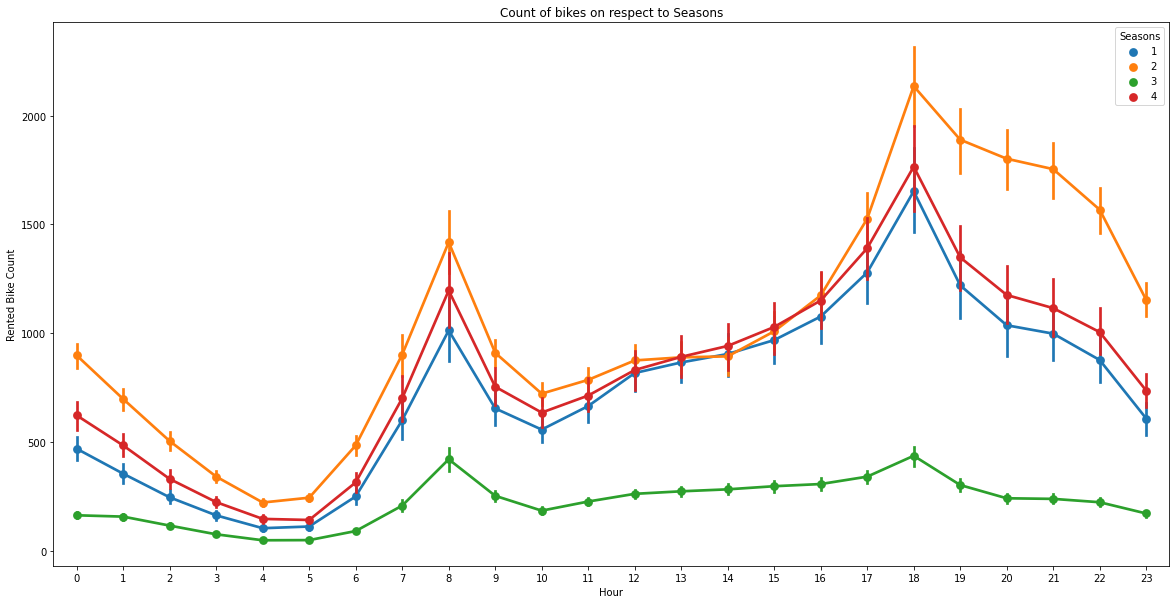

In [46]:
## without feature Selection
from sklearn.ensemble import GradientBoostingRegressor
modelgbr = GradientBoostingRegressor(random_state=0).fit(X_train,y_train)

modelgbr.score(X_test,y_test)

modelgbr.score(X_train,y_train)

y_pred2=modelgbr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))



fig, ax= plt.subplots(figsize=(20,10))
sns.pointplot(x='Hour',y='Rented Bike Count', data=dataframe,hue='Seasons', ax=ax)
ax.set(title='Count of bikes on respect to Seasons')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
modelgbrFS = GradientBoostingRegressor(random_state=0).fit(X_train,y_train)

modelgbrFS.score(X_test,y_test)

modelgbr.score(X_train,y_train)

y_pred2=modelgbr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))



fig, ax= plt.subplots(figsize=(20,10))
sns.pointplot(x='Hour',y='Rented Bike Count', data=dataframe,hue='Seasons', ax=ax)
ax.set(title='Count of bikes on respect to Seasons')

**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
modelrfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)

modelrfr.score(X_test,y_test)

modelrfr.score(X_train,y_train)

modelrfr.predict(X_test)

y_pred3= modelrfr.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 137.3713698630137
Mean Squared Error: 50919.4956010274
Root Mean Squared Error: 225.65348568330913


In [60]:
## Considering Results from Feature Selection
from sklearn.ensemble import RandomForestRegressor
modelrfrFS = RandomForestRegressor(random_state=0).fit(XFS_train, yFS_train)

modelrfrFS.score(XFS_test,yFS_test)

modelrfrFS.score(XFS_train,yFS_train)

modelrfrFS.predict(XFS_test)

yFS_pred3= modelrfrFS.predict(XFS_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(yFS_test, yFS_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(yFS_test, yFS_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yFS_test, yFS_pred3)))

Mean Absolute Error: 166.04349486301368
Mean Squared Error: 71371.1140282472
Root Mean Squared Error: 267.15372733362193


**Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state = 0)
decison_tree=decision_tree.fit(X_train, y_train)

y_pred4 = decision_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4)) 

decision_tree.score(X_test,y_test)

decision_tree.score(X_train,y_train) 

y_pred4= decision_tree.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Accuracy: 0.041666666666666664
Mean Absolute Error: 137.3713698630137
Mean Squared Error: 50919.4956010274
Root Mean Squared Error: 225.65348568330913
